<a href="https://colab.research.google.com/github/ItsMeBerk/MachineLearningCourse/blob/main/bayes_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

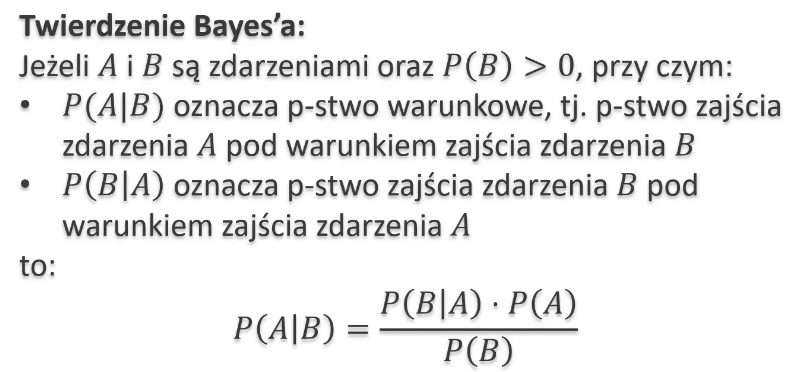

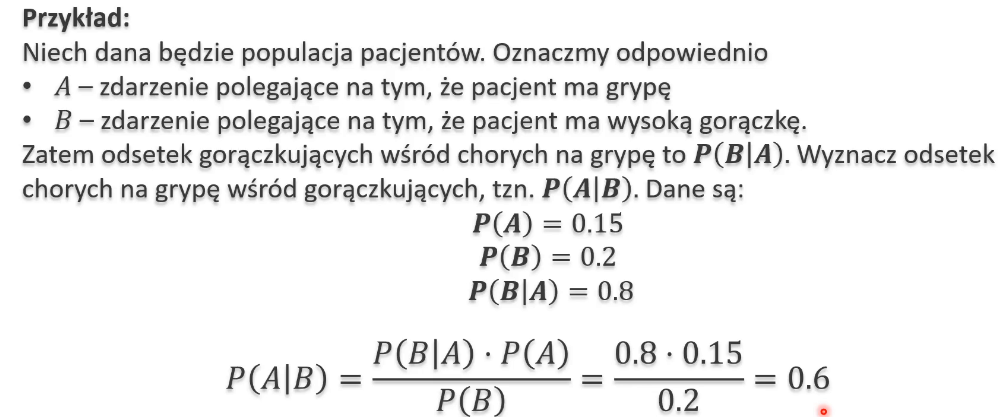

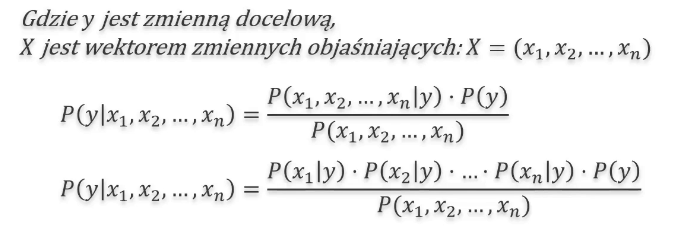

Przykład

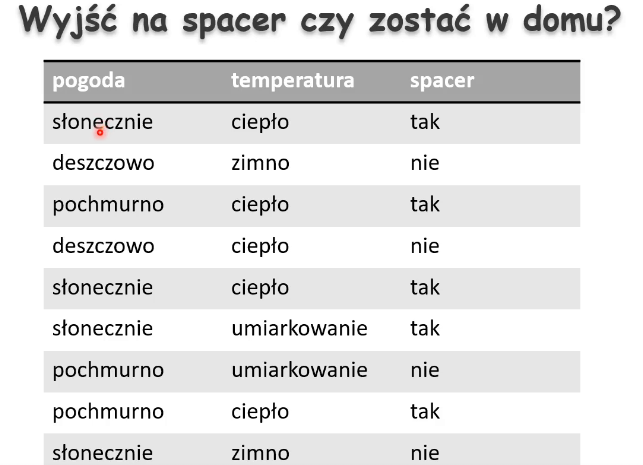

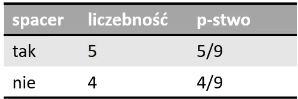

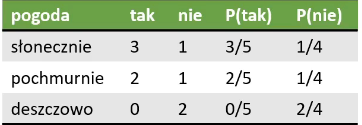

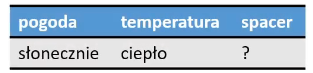

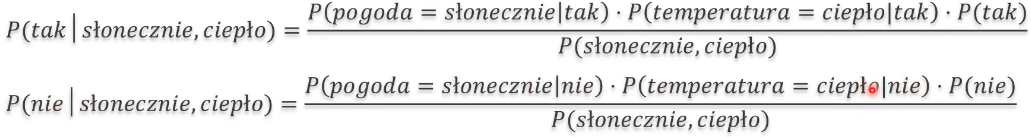

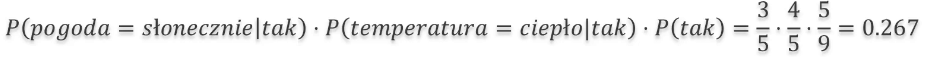

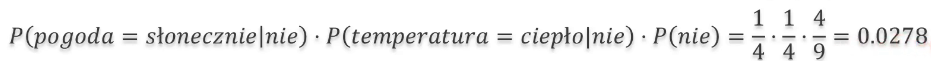

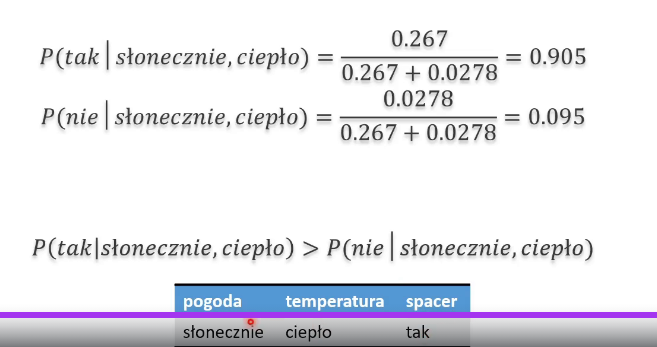

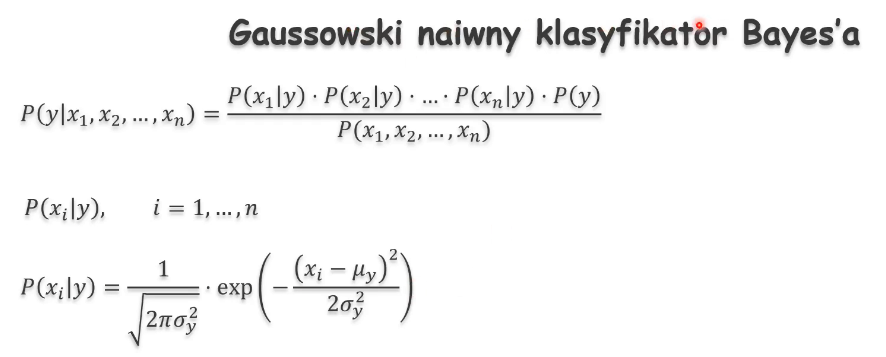

Przyjmujemy założenie, że ma rozkład normalny, dlatego Gaussian Naive Bayes Classificator

In [2]:
import numpy as np
import pandas as pd
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'1.2.2'

Wygenerowanie danych

In [3]:
pogoda = ['slonecznie','deszczowo','pochmurno','deszczowo','slonecznie','slonecznie', 'pochmurno', 'pochmurno', 'slonecznie']

temperatura = ['cieplo', 'zimno', 'cieplo', 'cieplo', 'cieplo', 'umiarkowanie', 'umiarkowanie', 'cieplo', 'zimno']

spacer = ['tak','nie','tak','nie','tak','tak','nie','nie','nie']

raw_df = pd.DataFrame(data={'pogoda': pogoda, 'temperatura': temperatura, 'spacer': spacer})
df = raw_df.copy()
df

,pogoda,temperatura,spacer
0,slonecznie,cieplo,tak
1,deszczowo,zimno,nie
2,pochmurno,cieplo,tak
3,deszczowo,cieplo,nie
4,slonecznie,cieplo,tak
5,slonecznie,umiarkowanie,tak
6,pochmurno,umiarkowanie,nie
7,pochmurno,cieplo,nie
8,slonecznie,zimno,nie


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['spacer'] = encoder.fit_transform(spacer)
df

,pogoda,temperatura,spacer
0,slonecznie,cieplo,1
1,deszczowo,zimno,0
2,pochmurno,cieplo,1
3,deszczowo,cieplo,0
4,slonecznie,cieplo,1
5,slonecznie,umiarkowanie,1
6,pochmurno,umiarkowanie,0
7,pochmurno,cieplo,0
8,slonecznie,zimno,0


In [5]:
df = pd.get_dummies(df, columns = ['pogoda','temperatura'], drop_first=True)
df

,spacer,pogoda_pochmurno,pogoda_slonecznie,temperatura_umiarkowanie,temperatura_zimno
0,1,0,1,0,0
1,0,0,0,0,1
2,1,1,0,0,0
3,0,0,0,0,0
4,1,0,1,0,0
5,1,0,1,1,0
6,0,1,0,1,0
7,0,1,0,0,0
8,0,0,1,0,1


In [7]:
data = df.copy()
target = data.pop('spacer')

data

,pogoda_pochmurno,pogoda_slonecznie,temperatura_umiarkowanie,temperatura_zimno
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0
5,0,1,1,0
6,1,0,1,0
7,1,0,0,0
8,0,1,0,1


In [8]:
target

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    0
Name: spacer, dtype: int64

Gaussian Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(data, target)

GaussianNB()

In [10]:
model.score(data, target)

0.6666666666666666

In [11]:
data.iloc[[0]]

,pogoda_pochmurno,pogoda_slonecznie,temperatura_umiarkowanie,temperatura_zimno
0,0,1,0,0


In [12]:
model.predict(data.iloc[[0]])

array([1])

In [13]:
encoder.classes_

array(['nie', 'tak'], dtype='<U3')

In [14]:
encoder.classes_[model.predict(data.iloc[[0]])[0]]

'tak'

In [15]:
encoder.classes_[model.predict(data.iloc[[0]])]

array(['tak'], dtype='<U3')

In [16]:
encoder.classes_[model.predict(data.iloc[[0]])[0]]

'tak'

In [17]:
model.predict_proba(data.iloc[[0]])

array([[0.000004, 0.999996]])